# What is done?

#### 1. Upsampling with forward and backward fill method upto 1 second frequency
#### 2. Downsampling to 10 second frequency
#### 3. Outlier detection and replacement

In [1]:
import numpy as np
import pandas as pd
import os
from os.path import join as jp
from warnings import warn

from tqdm import tqdm_notebook
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from logparser import *
from utils import *

Load the data:

In [2]:
data_init = convert_folder('./log_dir/')
# sort by DATE
data_init = data_init.sort_values(by='DATE')
# delete microseconds
data_init['DATE'] = data_init['DATE'].map(lambda x: x.replace(microsecond=0))
# remove lines with Missing Values (NaNs)
data_init = data_init[~data_init.isnull().sum(axis=1).astype(bool).values].reset_index(drop=True).copy()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
22it [00:00, 3676.87it/s]
0it [00:00, ?it/s]
165it [00:00, 3596.61it/s]
0it [00:00, ?it/s]
3it [00:00, 26.97it/s]/s]
0it [00:00, ?it/s]
13it [00:00, 3259.95it/s]
0it [00:00, ?it/s]C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:50: UserWarning: Possibly missing value in 47 line of file `./log_dir/data-2018-12-14-21.log` 
  warn("Possibly missing value in %s line of file `%s` " % (i+1, fp))
C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:52: UserWarning: Using previous values for this sample!
  warn("Using previous values for this sample!")
C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:50: UserWarning: Possibly missing value in 181 line of file `./log_dir/data-2018-12-14-21.log` 
  warn("Possibly missing value in %s line of file `%s` " % (i+1, fp))
C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:52: UserWarning: Using previous values for this sample!
  warn("Using prev

C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:52: UserWarning: Using previous values for this sample!
  warn("Using previous values for this sample!")

335it [00:00, 8612.27it/s]
0it [00:00, ?it/s]
343it [00:00, 12739.39it/s]
0it [00:00, ?it/s]
142it [00:06, 20.72it/s]/s]
0it [00:00, ?it/s]
342it [00:00, 13189.27it/s]
0it [00:00, ?it/s]
342it [00:00, 17144.57it/s]
0it [00:00, ?it/s]
145it [00:06, 21.25it/s]/s]
0it [00:00, ?it/s]
342it [00:00, 13189.03it/s]
0it [00:00, ?it/s]
342it [00:00, 21432.44it/s]
0it [00:00, ?it/s]
148it [00:06, 21.78it/s]/s]
0it [00:00, ?it/s]
343it [00:00, 15632.70it/s]
0it [00:00, ?it/s]
339it [00:00, 17889.87it/s]
0it [00:00, ?it/s]
151it [00:06, 22.57it/s]/s]
0it [00:00, ?it/s]
342it [00:00, 14909.75it/s]
0it [00:00, ?it/s]
343it [00:00, 20231.28it/s]
0it [00:00, ?it/s]
154it [00:06, 22.54it/s]/s]
0it [00:00, ?it/s]
341it [00:00, 14866.15it/s]
0it [00:00, ?it/s]
343it [00:00, 13227.71it/s]
0it [00:00, ?it/s]
157it [00:06, 22.06it/s]/s]


C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:52: UserWarning: Using previous values for this sample!
  warn("Using previous values for this sample!")

342it [00:00, 18071.84it/s]
0it [00:00, ?it/s]
274it [00:11, 24.09it/s]/s]
0it [00:00, ?it/s]
341it [00:00, 20112.46it/s]
0it [00:00, ?it/s]
341it [00:00, 13677.12it/s]
0it [00:00, ?it/s]
277it [00:11, 23.66it/s]/s]
0it [00:00, ?it/s]
339it [00:00, 13596.12it/s]
0it [00:00, ?it/s]
340it [00:00, 17043.50it/s]
0it [00:00, ?it/s]
280it [00:12, 23.50it/s]/s]
0it [00:00, ?it/s]
342it [00:00, 19048.31it/s]
0it [00:00, ?it/s]
337it [00:00, 22528.10it/s]
0it [00:00, ?it/s]
283it [00:12, 24.12it/s]/s]
0it [00:00, ?it/s]
340it [00:00, 26222.11it/s]
0it [00:00, ?it/s]
339it [00:00, 15457.62it/s]
0it [00:00, ?it/s]
286it [00:12, 24.52it/s]/s]
0it [00:00, ?it/s]
342it [00:00, 26381.70it/s]
0it [00:00, ?it/s]
339it [00:00, 19995.63it/s]
0it [00:00, ?it/s]
289it [00:12, 24.92it/s]/s]
0it [00:00, ?it/s]
341it [00:00, 17096.69it/s]

338it [00:00, 21197.29it/s]
0it [00:00, ?it/s]
427it [00:18, 22.43it/s]/s]
0it [00:00, ?it/s]
338it [00:00, 22590.99it/s]
0it [00:00, ?it/s]
338it [00:00, 22593.51it/s]
0it [00:00, ?it/s]
430it [00:18, 22.95it/s]/s]
0it [00:00, ?it/s]
312it [00:00, 19548.90it/s]
0it [00:00, ?it/s]
313it [00:00, 19616.83it/s]
0it [00:00, ?it/s]
433it [00:18, 23.60it/s]/s]
0it [00:00, ?it/s]
310it [00:00, 28259.82it/s]
0it [00:00, ?it/s]
305it [00:00, 23522.78it/s]
0it [00:00, ?it/s]
436it [00:18, 24.49it/s]/s]
0it [00:00, ?it/s]
331it [00:00, 25510.17it/s]
0it [00:00, ?it/s]
335it [00:00, 23994.87it/s]
0it [00:00, ?it/s]
439it [00:18, 24.72it/s]/s]
0it [00:00, ?it/s]
343it [00:00, 22929.19it/s]
0it [00:00, ?it/s]
344it [00:00, 22996.41it/s]
0it [00:00, ?it/s]
442it [00:18, 24.89it/s]/s]
0it [00:00, ?it/s]
334it [00:00, 33492.66it/s]
0it [00:00, ?it/s]
334it [00:00, 20904.86it/s]
0it [00:00, ?it/s]
445it [00:19, 25.13it/s]/s]
0it [00:00, ?it/s]
336it [00:00, 18717.11it/s]
0it [00:00, ?it/s]
317it [00:00,

0it [00:00, ?it/s]
592it [00:25, 16.83it/s]/s]
0it [00:00, ?it/s]
332it [00:00, 13870.72it/s]
0it [00:00, ?it/s]
594it [00:26, 16.52it/s]/s]
0it [00:00, ?it/s]
334it [00:00, 18605.70it/s]
0it [00:00, ?it/s]
596it [00:26, 16.81it/s]/s]
0it [00:00, ?it/s]
333it [00:00, 17583.86it/s]
0it [00:00, ?it/s]
598it [00:26, 17.50it/s]/s]
0it [00:00, ?it/s]
330it [00:00, 14387.05it/s]
0it [00:00, ?it/s]C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:50: UserWarning: Possibly missing value in 39 line of file `./log_dir/data-2019-01-09-17.log` 
  warn("Possibly missing value in %s line of file `%s` " % (i+1, fp))
C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:52: UserWarning: Using previous values for this sample!
  warn("Using previous values for this sample!")

600it [00:26, 17.81it/s]/s]
0it [00:00, ?it/s]
325it [00:00, 21724.18it/s]
0it [00:00, ?it/s]
314it [00:00, 18523.63it/s]
0it [00:00, ?it/s]
603it [00:26, 18.39it/s]/s]
0it [00:00, ?it/s]C:\Users\i34

0it [00:00, ?it/s]
723it [00:32, 19.47it/s]/s]
0it [00:00, ?it/s]
329it [00:00, 19407.15it/s]
0it [00:00, ?it/s]
326it [00:00, 23349.04it/s]
0it [00:00, ?it/s]
726it [00:32, 20.03it/s]/s]
0it [00:00, ?it/s]
332it [00:00, 20806.70it/s]
0it [00:00, ?it/s]
333it [00:00, 20866.87it/s]
0it [00:00, ?it/s]
729it [00:32, 19.76it/s]/s]
0it [00:00, ?it/s]
333it [00:00, 19640.62it/s]
0it [00:00, ?it/s]
731it [00:32, 19.44it/s]/s]
0it [00:00, ?it/s]
325it [00:00, 17150.84it/s]
0it [00:00, ?it/s]
733it [00:32, 19.40it/s]/s]
0it [00:00, ?it/s]
343it [00:00, 19106.04it/s]
0it [00:00, ?it/s]
735it [00:32, 19.50it/s]/s]
0it [00:00, ?it/s]
343it [00:00, 18101.87it/s]
0it [00:00, ?it/s]
737it [00:33, 19.18it/s]/s]
0it [00:00, ?it/s]
344it [00:00, 20283.70it/s]
0it [00:00, ?it/s]
343it [00:00, 26454.46it/s]
0it [00:00, ?it/s]
740it [00:33, 19.98it/s]/s]
0it [00:00, ?it/s]
343it [00:00, 22927.00it/s]
0it [00:00, ?it/s]
343it [00:00, 28658.29it/s]
0it [00:00, ?it/s]
743it [00:33, 20.70it/s]/s]
0it [00:00, ?

338it [00:00, 14735.21it/s]
0it [00:00, ?it/s]
858it [00:40, 16.02it/s]/s]
0it [00:00, ?it/s]
335it [00:00, 15994.40it/s]
0it [00:00, ?it/s]
860it [00:40, 16.46it/s]/s]
0it [00:00, ?it/s]
338it [00:00, 14120.97it/s]
0it [00:00, ?it/s]
862it [00:40, 16.61it/s]/s]
0it [00:00, ?it/s]
335it [00:00, 15995.67it/s]
0it [00:00, ?it/s]
864it [00:40, 16.76it/s]/s]
0it [00:00, ?it/s]
309it [00:00, 17213.29it/s]
0it [00:00, ?it/s]
866it [00:40, 16.92it/s]/s]
0it [00:00, ?it/s]
338it [00:00, 17836.65it/s]
0it [00:00, ?it/s]
868it [00:40, 16.85it/s]/s]
0it [00:00, ?it/s]
341it [00:00, 12663.09it/s]
0it [00:00, ?it/s]
870it [00:40, 16.56it/s]/s]
0it [00:00, ?it/s]
339it [00:00, 13073.58it/s]
0it [00:00, ?it/s]
872it [00:40, 16.46it/s]/s]
0it [00:00, ?it/s]
337it [00:00, 21121.00it/s]
0it [00:00, ?it/s]
874it [00:41, 16.81it/s]/s]
0it [00:00, ?it/s]
338it [00:00, 18819.02it/s]
0it [00:00, ?it/s]
876it [00:41, 17.19it/s]/s]
0it [00:00, ?it/s]
339it [00:00, 15450.90it/s]
0it [00:00, ?it/s]
878it [00:41,

In [3]:
data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296432 entries, 0 to 296431
Data columns (total 6 columns):
DATE    296432 non-null datetime64[ns]
T1      296432 non-null float64
T2      296432 non-null float64
T3      296432 non-null float64
T4      296432 non-null float64
MODE    296432 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 13.6+ MB


Upsample and downsample time-series:

In [4]:
ts_1s = pd.DataFrame({'DATE': pd.date_range(start=data_init['DATE'].min(),
                                            end=data_init['DATE'].max(),
                                            freq='1s')})

ts_10s = pd.DataFrame({'DATE': pd.date_range(start=data_init['DATE'].min(),
                                             end=data_init['DATE'].max(),
                                             freq='10s')})

In [5]:
data = pd.merge(ts_1s, data_init, how='left', on='DATE')
# forward fill to remove problem with 10s unmatching
data = data.ffill()
# downsample to 10s
data = pd.merge(ts_10s, data, how='left', on='DATE')

Detect outliers and replace them:

In [6]:
df = data.copy()
# slice data 
df = df[df['DATE'] >= '2019-01-18']
df['MODE'] = df['MODE'].map({'on': 1, 'off': 0})
df['MODE'] = df['MODE'].astype(np.int8)

In [7]:
def replace_outliers(dataframe, column, window=5, sensitivity=10):
    dataframe = dataframe.copy()
    ts_mean = dataframe[column].rolling(window).mean().bfill().ffill()
    dataframe[column] = dataframe[column].mask(np.abs(ts_mean - dataframe[column]) > sensitivity, np.nan)
    dataframe[column] = dataframe[column].ffill()
    return dataframe

In [8]:
# T_3 has several outliers -> have to replace them
df = replace_outliers(df, 'T1')
df = replace_outliers(df, 'T2')
df = replace_outliers(df, 'T3')
df = replace_outliers(df, 'T4')

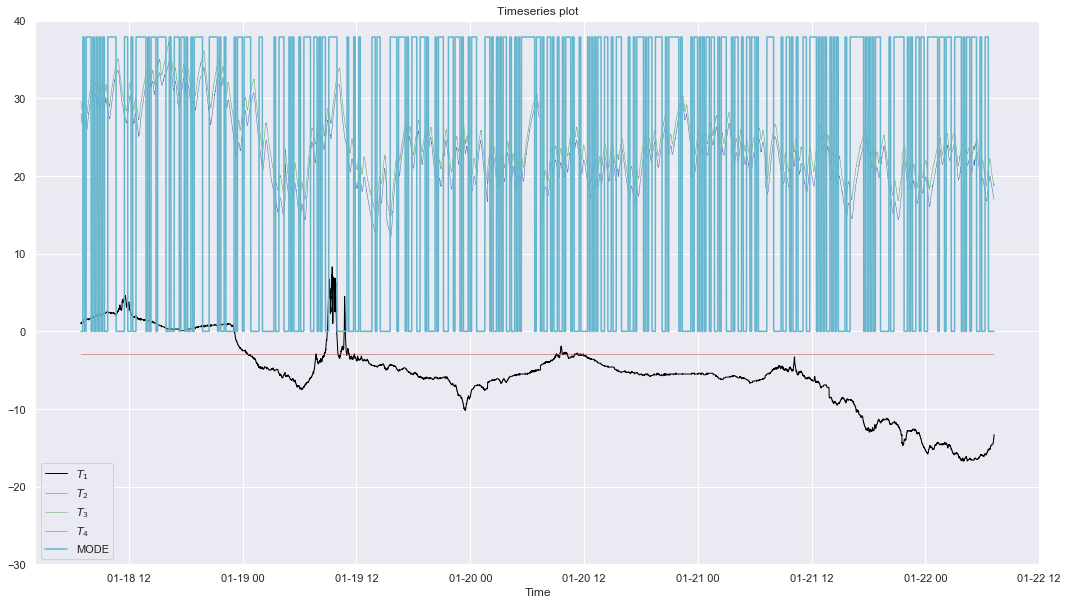

In [9]:
plot_ts(df.iloc[2500:])

In [10]:
df_part = df[(df.DATE >= '2019-01-19') & (df.DATE <= '2019-01-20')]

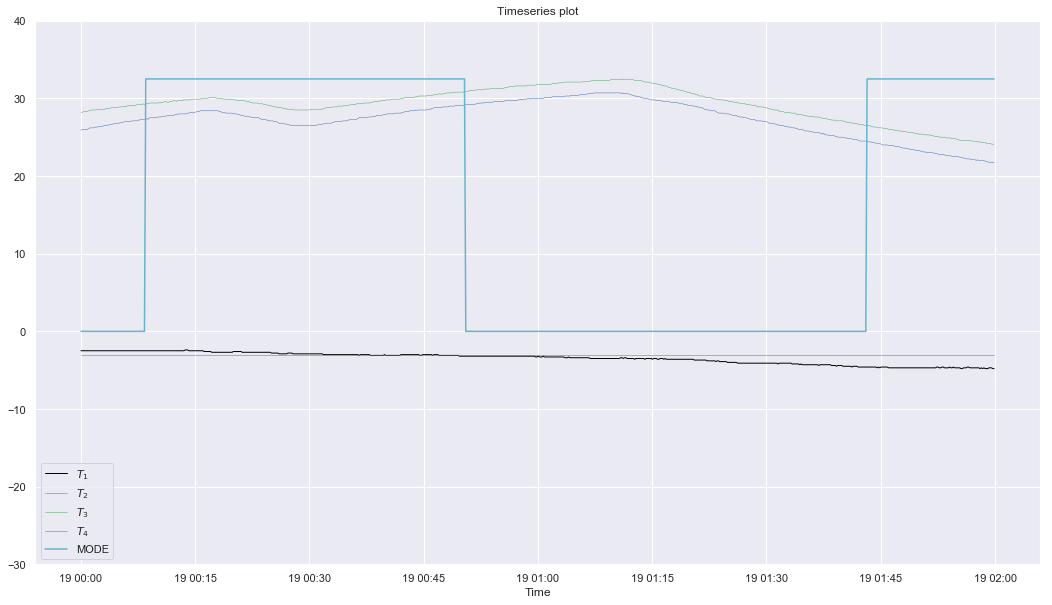

In [11]:
plot_ts(df_part.iloc[360*0: 360*2])

In [12]:
# df.iloc[2500:].reset_index(drop=True).to_parquet('./data/raw_10min_mode_v1.parquet')